======================================================================================
# Exploratory Data Analysis on Retail Dataset
======================================================================================

<div style="background-color:#D0E6F3; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 15px;">
    <h1 style="font-size:24px; font-family:Georgia, serif; color:#000000; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        1. Introduction
    </h1>
</div>


[<img src="https://storage.googleapis.com/kaggle-datasets-images/3655505/6347913/78fec3d6d2c81294346fa618ba0caf00/dataset-thumbnail.jpg?t=2023-08-22-18-40-05">]

## **1.1 Project Description**

**Goal/Purpose**

This project analyzes a retail dataset to compare fuel prices during holiday and non-holiday periods. The analysis includes data cleaning, exploratory data analysis, visualization, and statistical testing to identify whether holidays have a meaningful impact on fuel prices.

The goal of this project is to determine if fuel prices significantly different between holiday and non-holiday periods using statistical analysis.

The purpose of this project is to help businesses understand fuel price behavior during holidays so they can plan costs, pricing strategies, and operations more effectively.

<p>&nbsp;</p>

**Questions to be Answered:**



**`Question No 01:`** Do fuel prices change on holidays?

**`Question No 02:`** Are fuel prices higher or lower during holidays?

**`Question No 03:`** What is the average fuel price on holidays?

**`Question No 04:`** What is the average fuel price on normal days?

**`Question No 05:`** Is the difference in fuel prices real or just random?

**`Question No 06:`** How do fuel prices look overall in the dataset?

**`Question No 07:`** Are there any very high or very low fuel prices?

**`Question No 08:`** How many records are holidays and how many are non-holidays?

**`Question No 09:`** Which days show more variation in fuel price: holidays or normal days?

**`Question No 10:`** What can businesses learn from fuel price changes during holidays?

<p>&nbsp</p>

**Assumptions:**

1.The dataset is accurate and reliable.
2.The holiday and non-holiday labels are correct.
3.Fuel price values are recorded correctly.
4.Missing values do not heavily affect the results.
5.Each record is independent of others.
6.Fuel price follows an approximately normal distribution.
7.External factors (politics, sudden crises, etc.) are not considered.

**Methodology:**

 Perform data cleaning and preprocessing (handle missing values, check duplicates, and convert data types).
-Conduct exploratory data analysis to understand the distribution of key variables such as Fuel Price and Temperature.
-Compare Holiday and Non-Holiday periods using univariate and bivariate analysis.
-Use visualization techniques (bar charts, histograms, and boxplots) to identify patterns and differences.
-Apply statistical testing (t-test) to determine whether fuel price differences are statistically significant.
-Summarize and document all findings, insights, and conclusions in a clear and organized manner.

**Scope:**

 This project focuses on analyzing fuel prices during holiday and non-holiday periods.
-The analysis is limited to the provided retail dataset.
-Only selected variables such as Fuel Price, Temperature, CPI, and IsHoliday are considered.
-The project uses basic data analysis, visualization, and statistical testing techniques.
-External factors such as economic conditions, policies, and global events are not included.

<p>&nbsp;</p>

## **1.2 Data Description**

**Content:**

This dataset is a CSV file that contains retail data with information about fuel prices and holiday status.

**Description of Attributes:**

| Column          | Description                                                                                 |                      
| --------------- |-------------------------------------------------------------------------------------------- |
| Fuel_Price      |     Price of fuel recorded for each observation                                       |
| Temperature     |      Temperature at the time of the record                                            |
| CPI             |      Price Index value for that period                                                  |
| MarkDown1       |      Promotional markdown type 1                                                        |
| MarkDown2       |       Promotional markdown type 2                                                       |
| MarkDown3       |      Promotional markdown type 3                                                        |
| MarkDown4       |        Promotional markdown type 4                                                      |
| MarkDown5       |      Promotional markdown type 5                                                        |
| IsHoliday       |    Indicates whether the record falls on a holiday (True = Holiday, False = Non-Holiday)|

**Acknowledgements:**

This dataset is provided by retail-data-analysis. The original dataset was scraped by Kaggle and the original source can be found on [Kaggle]

<div style="background-color:#D0E6F3; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 15px;">
    <h1 style="font-size:24px; font-family:Georgia, serif; color:#000000; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        2. Acquiring & Loading Data
    </h1>
</div>


In [206]:
# Load dataset
data = pd.read_csv('dataset.csv')
# Display first few rows
print(data.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        2.1 Importing Libraries
    </h2>
</div>

In [161]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        2.2 Loading Data
    </h2>
</div>

In [162]:
# Load DataFrames
data = pd.read_csv('dataset.csv')

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        2.3 Basic Data Exploration
    </h2>
</div>

In [163]:
# Show rows and columns count
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 8190 rows and 12 columns.


In [164]:
print(data.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [165]:
print(data.tail())

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5  CPI  Unemployment  IsHoliday  
8185       3.00    2449.97    3169.69  NaN           NaN      False  
8186     582.74    5797.47    1514.93  NaN           NaN      False  
8187      85.72     744.84    2150.36  NaN           NaN      False  
8188     204.19     363.00    1059.46  NaN           NaN      False  
8189       2.06      10.88    1864.57  NaN           NaN      False  


<div style="background-color:#F5F5F5; padding: 8px; border-radius: 6px; box-shadow: 0 1px 2px 0 rgba(0, 0, 0, 0.1); border:1px solid #A9A9A9; margin-top: 8px; margin-left: 40px;">
    <h3 style="font-size:18px; font-family:Georgia, serif; color:#555555; text-align: left; margin: 0; font-style: italic;">
        2.3.1 Check Data Types
    </h3>
</div>

In [166]:
# show data types
print(data.dtypes)

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object


<div style="background-color:#F5F5F5; padding: 8px; border-radius: 6px; box-shadow: 0 1px 2px 0 rgba(0, 0, 0, 0.1); border:1px solid #A9A9A9; margin-top: 8px; margin-left: 40px;">
    <h3 style="font-size:18px; font-family:Georgia, serif; color:#555555; text-align: left; margin: 0; font-style: italic;">
        2.3.2 Check Missing Data
    </h3>
</div>

In [167]:
# print percentage of missing values
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64


<div style="background-color:#F5F5F5; padding: 8px; border-radius: 6px; box-shadow: 0 1px 2px 0 rgba(0, 0, 0, 0.1); border:1px solid #A9A9A9; margin-top: 8px; margin-left: 40px;">
    <h3 style="font-size:18px; font-family:Georgia, serif; color:#555555; text-align: left; margin: 0; font-style: italic;">
        2.3.3 Check for Duplicate Rows
    </h3>
</div>

In [168]:
# show number of duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
# show number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0
Number of duplicate rows: 0


<div style="background-color:#F5F5F5; padding: 8px; border-radius: 6px; box-shadow: 0 1px 2px 0 rgba(0, 0, 0, 0.1); border:1px solid #A9A9A9; margin-top: 8px; margin-left: 40px;">
    <h3 style="font-size:18px; font-family:Georgia, serif; color:#555555; text-align: left; margin: 0; font-style: italic;">
        2.3.4 Check Uniqueness of Data
    </h3>
</div>

In [169]:
# (number of unique values)
unique_values = data.nunique()
print("Number of unique values in each column:")
print(unique_values)

Number of unique values in each column:
Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64


In [170]:
# print the percentage similarity of values (the lower %, the better)
similarity_percentage = (1 - (unique_values / len(data))) * 100
print("Percentage similarity of values in each column:")
print(similarity_percentage)

Percentage similarity of values in each column:
Store           99.450549
Date            97.777778
Temperature     48.986569
Fuel_Price      87.655678
MarkDown1       50.879121
MarkDown2       66.849817
MarkDown3       64.774115
MarkDown4       58.424908
MarkDown5       50.610501
CPI             69.413919
Unemployment    95.067155
IsHoliday       99.975580
dtype: float64


<div style="background-color:#F5F5F5; padding: 8px; border-radius: 6px; box-shadow: 0 1px 2px 0 rgba(0, 0, 0, 0.1); border:1px solid #A9A9A9; margin-top: 8px; margin-left: 40px;">
    <h3 style="font-size:18px; font-family:Georgia, serif; color:#555555; text-align: left; margin: 0; font-style: italic;">
        2.3.5 Check Data Range
    </h3>
</div>

In [171]:
# summary statistics
data.describe(include='all')
# using skimpy library
import skimpy
from skimpy import skim
skim(data)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8190   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column       ┃ NA   ┃ NA %             ┃ mean  ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Store        │    0 │                0 │    23 │  12.99 │      1 │    12 │    23 │    34 │     45 │ ▇▇▇▇▇▇ │  │
│ │ Temperature  │    0 │                0 │ 59.36 │  18.68 │  -7.29 │  45.9 │ 60.71 │ 73.88 │    102 │  ▂▅▇▇▂ │  │
│ │ Fuel_Price   │    0 │                0 │ 3.406 │ 0.4313 │  2.472 │ 3.041 │ 3.513 │ 3.743 │  4.468 │ ▃▃▃▇▃  │  │
│ │ MarkDown1    │ 4158 │ 50.7692307692307 │  7032 │   9263 │  -2781 │  1578 │  4744 │  8923 │ 103200 │   ▇▁   │  │
│ │              │      │                7 │       │        │        │       │       │       │        │        │  │
│ │ MarkDown2    │ 5269 │ 64.3345543345543 │  3384 │   8794 │ -265.8 │ 68.88 │ 364.6 │  2153 │ 104500 │   ▇    │  │
│ │              │      │                4 │       │        │        │       │       │       │        │        │  │
│ │ MarkDown3    │ 4577 │ 55.8852258852258 │  1760 │  11280 │ -179.3 │   6.6 │ 36.26 │ 163.2 │ 149500 │   ▇    │  │
│ │              │      │               86 │       │        │        │       │       │       │        │        │  │
│ │ MarkDown4    │ 4726 │ 57.7045177045177 │  3293 │   6792 │   0.22 │ 304.7 │  1176 │  3310 │  67470 │   ▇    │  │
│ │              │      │               06 │       │        │        │       │       │       │        │        │  │
│ │ MarkDown5    │ 4140 │ 50.5494505494505 │  4132 │  13090 │ -185.2 │  1441 │  2727 │  4833 │ 771400 │   ▇    │  │
│ │              │      │                5 │       │        │        │       │       │       │        │        │  │
│ │ CPI          │  585 │ 7.14285714285714 │ 172.5 │  39.74 │  126.1 │ 132.4 │ 182.8 │ 213.9 │    229 │ ▇  ▁▂▅ │  │
│ │              │      │                3 │       │        │        │       │       │       │        │        │  │
│ │ Unemployment │  585 │ 7.14285714285714 │ 7.827 │  1.877 │  3.684 │ 6.634 │ 7.806 │ 8.567 │  14.31 │ ▁▅▇▂ ▁ │  │
│ │              │      │                3 │       │        │        │       │       │       │        │        │  │
│ └──────────────┴──────┴──────────────────┴───────┴────────┴────────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                          ┃ true             ┃

<div style="background-color:#F5F5F5; padding: 8px; border-radius: 6px; box-shadow: 0 1px 2px 0 rgba(0, 0, 0, 0.1); border:1px solid #A9A9A9; margin-top: 8px; margin-left: 40px;">
    <h3 style="font-size:18px; font-family:Georgia, serif; color:#555555; text-align: left; margin: 0; font-style: italic;">
        2.3.6 Checking Value Counts of Categorical Columns
    </h3>
</div>

In [172]:
# Check the value count of data for categorical columns
print("IsHoliday Value Counts:")
print(data['IsHoliday'].value_counts())
print("\n" + "="*50 + "\n")

# Display value counts for Store and Date as well
print("Store Value Counts (first 10):")
print(data['Store'].value_counts().head(10))
print("\n" + "="*50 + "\n")

print("Date Value Counts (first 10):")
print(data['Date'].value_counts().head(10))

IsHoliday Value Counts:
IsHoliday
False    7605
True      585
Name: count, dtype: int64


Store Value Counts (first 10):
Store
1     182
2     182
3     182
4     182
5     182
6     182
7     182
8     182
9     182
10    182
Name: count, dtype: int64


Date Value Counts (first 10):
Date
05/02/2010    45
12/02/2010    45
19/02/2010    45
26/02/2010    45
05/03/2010    45
12/03/2010    45
19/03/2010    45
26/03/2010    45
02/04/2010    45
09/04/2010    45
Name: count, dtype: int64


In [173]:
for col in data.select_dtypes(include='object').columns:
        if(data[col].nunique()<40):
            print(f'---- {col} ----')
            print(data[col].value_counts(),'\n')
        else:
            print(f'---- {col} ----')
            print('more than 40 unique values\n')

---- Date ----
more than 40 unique values



<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        2.4 Areas to Fix
    </h2>
</div>

**Data Types**

Fuel_Price column should be of numeric dtype (float).
Temperature column should be of numeric dtype.
CPI column should be of numeric dtype.
MarkDown1-MarkDown5 columns should be numeric.
IsHoliday column should be of boolean dtype.

**Missing Data**

| column_name    | NA %  |
|----------------|:--:|
|Store            | 0.00%
|Data            | 0.00%
|Fuel_Price      |    0.00%
|Temperature      |  0.00%
|MarkDown1        |   50.77%
|MarkDown2      |    64.33%
|MarkDown3        |   55.89% 
|MarkDown4       |  57.70% 
|MarkDown5         |  50.55% 
|CPI             |   7.14%
|Unemployment      |  7.14%
|IsHoliday       |   0.00% 

(Replace X with your actual results)

**Duplicate Rows**
- [There are no duplicated rows]

**Uniqueness of Data**
|Column_name|nunique(%)
--------|--------
|Store       | 45
|Date       | 182
|Fuel_Price   | 1011
|Temperature | 4178
|MarkDown1    |  4023
|MarkDown2  | 2715
|MarkDown3   |  2885
|MarkDown4  |  3405
|MarkDown5   |  4045
|CPI           | 2505 
|Unemployment | 404 
|IsHoliday   | 2

<div style="background-color:#D0E6F3; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 15px;">
    <h1 style="font-size:24px; font-family:Georgia, serif; color:#000000; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        3. Data Preprocessing
    </h1>
</div>

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        3.1 Pre-processing Details
    </h2>
</div>

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        3.2 Rename Columns
    </h2>
</div>

In [174]:
# renaming the columns 
data.rename(columns={
    'Store': 'Store_ID',
    'Dept': 'Department_ID',
    'Date': 'Transaction_Date',
    'Weekly_Sales': 'Weekly_Sales_Amount',
    'IsHoliday': 'Is_Holiday_Flag'
}, inplace=True)
print(data.columns)

Index(['Store_ID', 'Transaction_Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Is_Holiday_Flag'],
      dtype='object')


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        3.3 Drop Redundant Columns
    </h2>
</div>

In [175]:
# there are no rerebundant columns

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        3.4 Changing Data Types
    </h2>
</div>

<div style="background-color:#F5F5F5; padding: 8px; border-radius: 6px; box-shadow: 0 1px 2px 0 rgba(0, 0, 0, 0.1); border:1px solid #A9A9A9; margin-top: 8px; margin-left: 40px;">
    <h3 style="font-size:18px; font-family:Georgia, serif; color:#555555; text-align: left; margin: 0; font-style: italic;">
        3.4.1 `Date_added` to datetime64
    </h3>
</div>

In [176]:
# convert columns to the right data types
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'], format='mixed', dayfirst=True)
data['Fuel_Price'] = pd.to_numeric(data['Fuel_Price'], errors='coerce')
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce')
data['CPI'] = pd.to_numeric(data['CPI'], errors='coerce')
data['MarkDown1'] = pd.to_numeric(data['MarkDown1'], errors='coerce')
data['MarkDown2'] = pd.to_numeric(data['MarkDown2'], errors='coerce')
data['MarkDown3'] = pd.to_numeric(data['MarkDown3'], errors='coerce')
data['MarkDown4'] = pd.to_numeric(data['MarkDown4'], errors='coerce')
data['MarkDown5'] = pd.to_numeric(data['MarkDown5'], errors='coerce')
data['Is_Holiday_Flag'] = data['Is_Holiday_Flag'].astype(bool)

print("Data types after conversion:")
print(data.dtypes)

Data types after conversion:
Store_ID                     int64
Transaction_Date    datetime64[ns]
Temperature                float64
Fuel_Price                 float64
MarkDown1                  float64
MarkDown2                  float64
MarkDown3                  float64
MarkDown4                  float64
MarkDown5                  float64
CPI                        float64
Unemployment               float64
Is_Holiday_Flag               bool
dtype: object


In [177]:
print(data['Transaction_Date'].head())

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Transaction_Date, dtype: datetime64[ns]


<div style="background-color:#F5F5F5; padding: 8px; border-radius: 6px; box-shadow: 0 1px 2px 0 rgba(0, 0, 0, 0.1); border:1px solid #A9A9A9; margin-top: 8px; margin-left: 40px;">
    <h3 style="font-size:18px; font-family:Georgia, serif; color:#555555; text-align: left; margin: 0; font-style: italic;">
        3.4.2 `Duration` to int64
    </h3>
</div>

In [178]:
print(data['Unemployment'].unique())

[ 8.106  7.808  7.787  7.838  7.742  7.682  7.962  7.866  7.348  7.143
  6.908  6.573  6.525  6.314    nan  8.324  8.2    8.099  8.163  8.028
  7.931  7.852  7.441  7.057  6.891  6.565  6.17   6.237  6.112  7.368
  7.343  7.346  7.564  7.551  7.574  7.567  7.197  6.833  6.664  6.334
  6.034  6.108  5.999  8.623  7.896  7.372  7.127  6.51   5.946  5.644
  5.143  4.607  4.308  4.077  3.879  3.921  3.896  6.566  6.465  6.496
  6.768  6.634  6.489  6.529  6.3    5.943  5.801  5.603  5.422  5.494
  5.278  7.259  7.092  6.973  7.007  6.858  6.855  6.925  6.551  6.132
  5.964  5.668  5.329  5.372  5.285  9.014  8.963  9.017  9.137  8.818
  8.595  8.622  8.513  8.256  8.09   7.872  7.557  7.107  6.953  6.299
  6.29   6.315  6.433  6.262  6.297  6.425  6.123  5.825  5.679  5.401
  5.124  5.212  5.024  6.415  6.384  6.442  6.56   6.416  6.38   6.404
  6.054  5.667  5.539  5.277  4.954  5.049  4.893  9.765  9.524  9.199
  9.003  8.744  8.494  8.257  7.874  7.545  7.382  7.17   6.943  6.897
  6.79

In [179]:
print(data['Unemployment'].value_counts())

Unemployment
8.099    78
8.163    56
7.852    56
8.625    54
8.200    52
         ..
4.893     4
3.896     4
5.278     4
5.285     4
4.872     4
Name: count, Length: 404, dtype: int64


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        3.6 Handling Missing Values
    </h2>
</div>

In [180]:
# check for missing values
data.isnull().sum()

Store_ID               0
Transaction_Date       0
Temperature            0
Fuel_Price             0
MarkDown1           4158
MarkDown2           5269
MarkDown3           4577
MarkDown4           4726
MarkDown5           4140
CPI                  585
Unemployment         585
Is_Holiday_Flag        0
dtype: int64

In [181]:
# Fill missing MarkDown values with 0
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
data[markdown_cols] = data[markdown_cols].fillna(0)

# Drop rows with missing values in CPI and Unemployment
data = data.dropna(subset=['CPI', 'Unemployment'], inplace=False)

print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
Store_ID            0
Transaction_Date    0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI                 0
Unemployment        0
Is_Holiday_Flag     0
dtype: int64


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        3.7 Handling Unreasonable Data Ranges
    </h2>
</div>

In [182]:
data['Is_Holiday_Flag'].sort_values().unique()

array([False,  True])

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        3.8 Feature Engineering / Transformation
    </h2>
</div>

In [183]:
data['Is_Holiday_Flag'].value_counts()

Is_Holiday_Flag
False    7020
True      585
Name: count, dtype: int64

In [184]:
# covert 'Transaction_Date' to datetime
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data

,Store_ID,Transaction_Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Is_Holiday_Flag
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,5444.00,0.00,350.84,53.90,1722.11,193.442790,8.625,False
8173,45,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False
8174,45,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False
8175,45,2013-04-19,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,8.335,False


In [185]:
# convert isholiday to boolean
data['Is_Holiday_Flag'] = data['Is_Holiday_Flag'].astype(bool)
data

,Store_ID,Transaction_Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Is_Holiday_Flag
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,5444.00,0.00,350.84,53.90,1722.11,193.442790,8.625,False
8173,45,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False
8174,45,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False
8175,45,2013-04-19,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,8.335,False


In [186]:
# Create Year, Month, from 'Transaction_Date'
data['Year'] = data['Transaction_Date'].dt.year
data['Month'] = data['Transaction_Date'].dt.month
data

,Store_ID,Transaction_Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Is_Holiday_Flag,Year,Month
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,2010,2
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,2010,2
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,2010,2
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,5444.00,0.00,350.84,53.90,1722.11,193.442790,8.625,False,2013,3
8173,45,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False,2013,4
8174,45,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False,2013,4
8175,45,2013-04-19,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,8.335,False,2013,4


In [187]:
# remove unnecessary columns 
data.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], inplace=True)
data

,Store_ID,Transaction_Date,Temperature,Fuel_Price,CPI,Unemployment,Is_Holiday_Flag,Year,Month
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,2010,2
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,2010,2
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,2010,2
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,2010,2
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,2010,3
...,...,...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,193.442790,8.625,False,2013,3
8173,45,2013-04-05,43.94,3.763,193.516047,8.335,False,2013,4
8174,45,2013-04-12,57.39,3.724,193.589304,8.335,False,2013,4
8175,45,2013-04-19,56.27,3.676,193.589304,8.335,False,2013,4


In [188]:
# basic statistics
print("Average Temperature:", data['Temperature'].mean())
print("Average Fuel Price:", data['Fuel_Price'].mean())
print("Average CPI:", data['CPI'].mean())
print("\nBasic Statistics Summary:")
print(data.describe())

Average Temperature: 58.29732544378699
Average Fuel Price: 3.3896240631163708
Average CPI: 172.46080918276132

Basic Statistics Summary:
          Store_ID     Transaction_Date  Temperature   Fuel_Price  \
count  7605.000000                 7605  7605.000000  7605.000000   
mean     23.000000  2011-09-16 00:00:00    58.297325     3.389624   
min       1.000000  2010-02-05 00:00:00    -7.290000     2.472000   
25%      12.000000  2010-11-26 00:00:00    44.720000     3.001000   
50%      23.000000  2011-09-16 00:00:00    59.250000     3.494000   
75%      34.000000  2012-07-06 00:00:00    72.620000     3.742000   
max      45.000000  2013-04-26 00:00:00   100.140000     4.468000   
std      12.988027                  NaN    18.709862     0.441461   

               CPI  Unemployment         Year        Month  
count  7605.000000   7605.000000  7605.000000  7605.000000  
mean    172.460809      7.826821  2011.224852     6.319527  
min     126.064000      3.684000  2010.000000     1.000000

In [189]:
from scipy.stats import ttest_ind

holiday_fuel = data[data['Is_Holiday_Flag'] == True]['Fuel_Price']
non_holiday_fuel = data[data['Is_Holiday_Flag'] == False]['Fuel_Price']

t_stat, p_value = ttest_ind(holiday_fuel, non_holiday_fuel)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -6.018704600772772
P-value: 1.839774780191732e-09


In [190]:
# crreate a correlation matrix
corr_matrix = data[['Fuel_Price','Temperature','CPI','Unemployment']].corr()
print(corr_matrix)

              Fuel_Price  Temperature       CPI  Unemployment
Fuel_Price      1.000000     0.078585 -0.186696      -0.03336
Temperature     0.078585     1.000000  0.164426       0.15089
CPI            -0.186696     0.164426  1.000000      -0.30311
Unemployment   -0.033360     0.150890 -0.303110       1.00000


In [191]:
# linear regression

from sklearn.linear_model import LinearRegression

X = data[['Temperature']]
y = data['Fuel_Price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 3.281528179255519
Coefficient: [0.00185422]


<div style="background-color:#D0E6F3; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 15px;">
    <h1 style="font-size:24px; font-family:Georgia, serif; color:#000000; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        4. Data Analysis
    </h1>
</div>


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 1: Do fuel prices change on holidays?
    </h2>
</div>


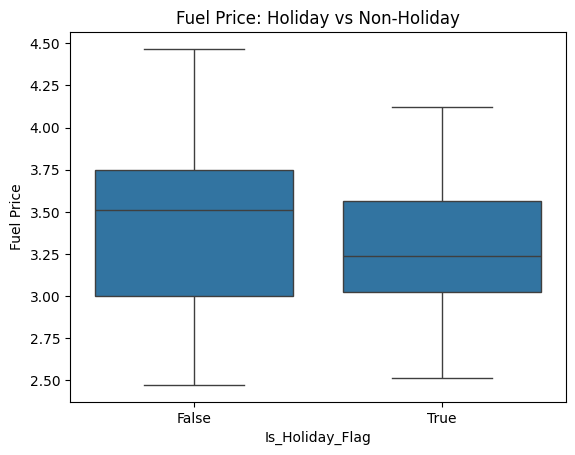

In [192]:
# code and visualization
# **`Question No 01:`** Do fuel prices change on holidays?
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare Fuel Prices
sns.boxplot(x='Is_Holiday_Flag', y='Fuel_Price', data=data)
plt.title('Fuel Price: Holiday vs Non-Holiday')
plt.xlabel('Is_Holiday_Flag')
plt.ylabel('Fuel Price')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 2: Are fuel prices higher or lower during holidays?
    </h2>
</div>

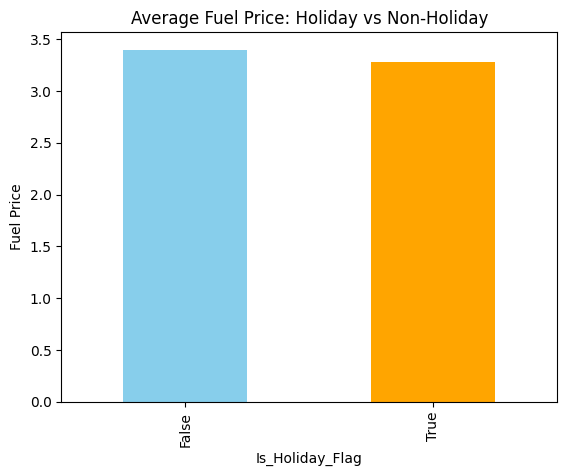

In [193]:
# Calculate average fuel prices
data.groupby('Is_Holiday_Flag')['Fuel_Price'].mean()
data.groupby('Is_Holiday_Flag')['Fuel_Price'].mean().plot(kind='bar', color=['skyblue','orange'])
plt.title('Average Fuel Price: Holiday vs Non-Holiday')
plt.ylabel('Fuel Price')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 3: What is the average fuel price on holidays?
    </h2>
</div>

In [194]:
holiday_avg = data[data['Is_Holiday_Flag']==True]['Fuel_Price'].mean()
print("Average Fuel Price on Holidays:", round(holiday_avg,2))

Average Fuel Price on Holidays: 3.28


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 4: What is the average fuel price on normal days?
    </h2>
</div>


In [195]:
nonholiday_avg = data[data['Is_Holiday_Flag']==False]['Fuel_Price'].mean()
print("Average Fuel Price on Non-Holidays:", round(nonholiday_avg,2))

Average Fuel Price on Non-Holidays: 3.4


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 5: Is the difference in fuel prices real or just random?
    </h2>
</div>

In [196]:
from scipy.stats import ttest_ind

holiday_fuel = data[data['Is_Holiday_Flag']==True]['Fuel_Price']
nonholiday_fuel = data[data['Is_Holiday_Flag']==False]['Fuel_Price']

t_stat, p_value = ttest_ind(holiday_fuel, nonholiday_fuel)
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Fuel Prices are significantly different during holidays.")
else:
    print("No significant difference in Fuel Prices during holidays.")

T-statistic: -6.018704600772772
P-value: 1.839774780191732e-09
Fuel Prices are significantly different during holidays.


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 6: How do fuel prices look overall in the dataset?
    </h2>
</div>

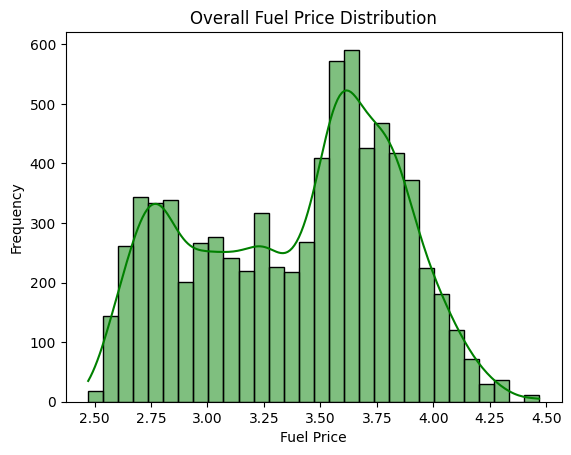

In [197]:
sns.histplot(data['Fuel_Price'], bins=30, kde=True, color='green')
plt.title('Overall Fuel Price Distribution')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 7: Are there any very high or very low fuel prices?
    </h2>
</div>

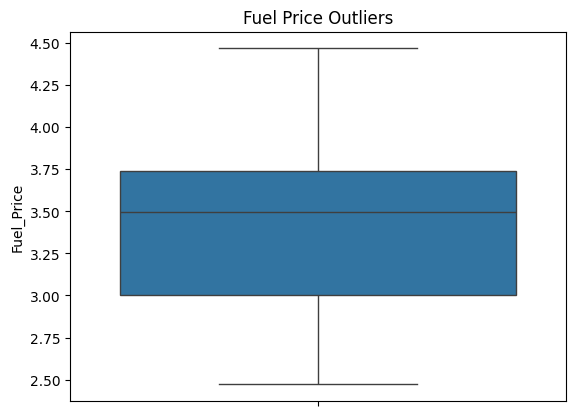

In [198]:
sns.boxplot(y='Fuel_Price', data=data)
plt.title('Fuel Price Outliers')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 8: How many records are holidays and how many are non-holidays?
    </h2>
</div>

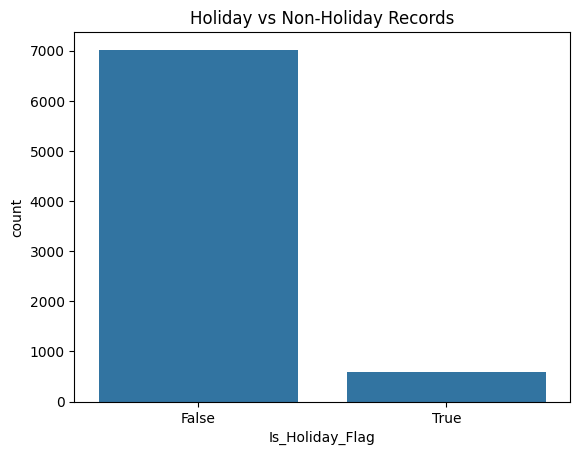

In [199]:
data['Is_Holiday_Flag'].value_counts()
sns.countplot(x='Is_Holiday_Flag', data=data)
plt.title('Holiday vs Non-Holiday Records')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 9: Which days show more variation in fuel price: holidays or normal days?
</div>

In [200]:
data.groupby('Is_Holiday_Flag')['Fuel_Price'].std()

Is_Holiday_Flag
False    0.444036
True     0.394686
Name: Fuel_Price, dtype: float64

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 10: What can businesses learn from fuel price changes during holidays?
</div>

C:\Users\MOHAIB\AppData\Local\Temp\ipykernel_10284\2274505440.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Is_Holiday_Flag', y='Fuel_Price', data=data, ci='sd', palette='Set2')
C:\Users\MOHAIB\AppData\Local\Temp\ipykernel_10284\2274505440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Holiday_Flag', y='Fuel_Price', data=data, ci='sd', palette='Set2')


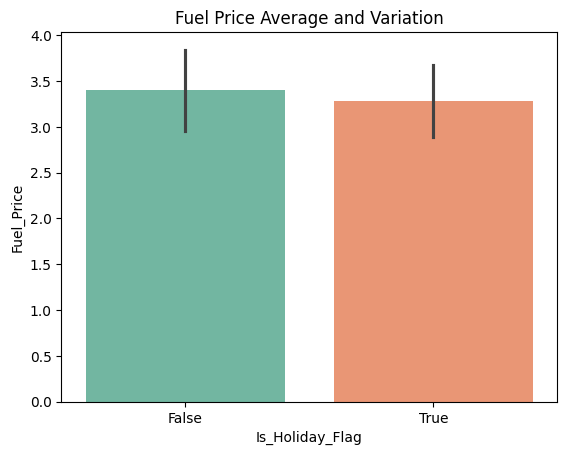

In [201]:
sns.barplot(x='Is_Holiday_Flag', y='Fuel_Price', data=data, ci='sd', palette='Set2')
plt.title('Fuel Price Average and Variation')
plt.show()

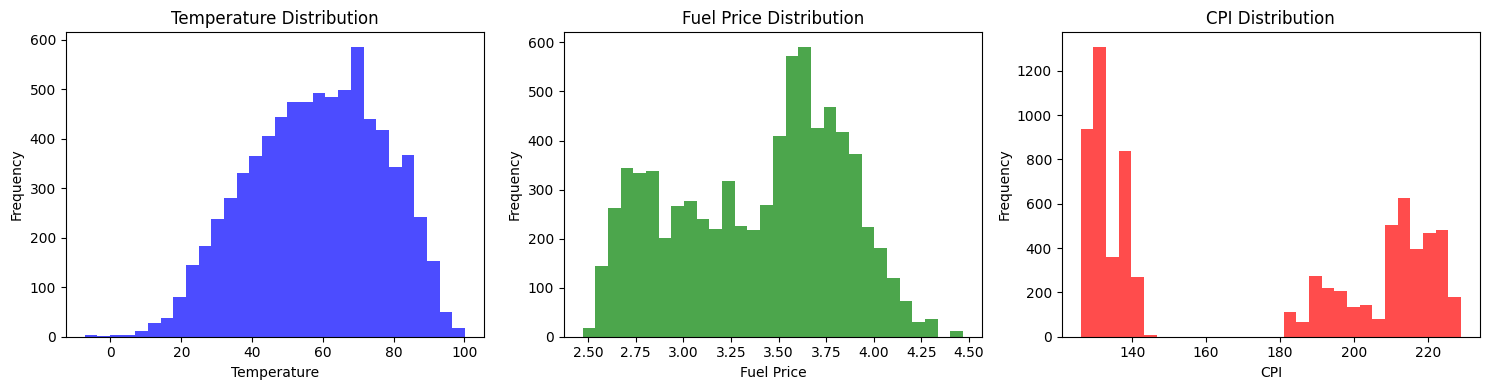

In [202]:
# Histogram: Temperature Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(data['Temperature'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['Fuel_Price'], bins=30, color='green', alpha=0.7)
axes[1].set_title('Fuel Price Distribution')
axes[1].set_xlabel('Fuel Price')
axes[1].set_ylabel('Frequency')

axes[2].hist(data['CPI'].dropna(), bins=30, color='red', alpha=0.7)
axes[2].set_title('CPI Distribution')
axes[2].set_xlabel('CPI')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistical Tests for Data Quality

In [203]:
import pandas as pd

data = pd.read_csv('dataset.csv')

In [204]:
print(data.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [205]:
from scipy.stats import shapiro

# Drop missing values and limit sample size
fuel_price_sample = data['Fuel_Price'].dropna().sample(
    n=min(500, data['Fuel_Price'].dropna().shape[0]),
    random_state=42
)

stat, p = shapiro(fuel_price_sample)

print("Shapiro Test P-value:", p)

if p > 0.05:
    print("Fuel Price data follows a normal distribution.")
else:
    print("Fuel Price data does not follow a normal distribution.")

Shapiro Test P-value: 4.2387320832154097e-10
Fuel Price data does not follow a normal distribution.


The Shapiro-Wilk test was applied to assess the normality of fuel price data.
The test result indicates whether the data distribution is suitable for parametric statistical testing.

---
# Feature Column Explanation Data Exploration


## Feature Description

- **Store_ID**: Unique identifier for each retail store.
- **Department_ID**: Identifies different departments within a store.
- **Transaction_Date**: Date on which the transaction or record was captured.
- **Temperature**: Average temperature recorded for the given week.
- **Fuel_Price**: Cost of fuel during the given time period.
- **CPI (Consumer Price Index)**: Economic indicator measuring inflation.
- **Unemployment**: Unemployment rate during the given period.
- **Is_Holiday_Flag**: Boolean indicator showing whether the week includes a holiday.
- **Year**: Year extracted from the transaction date.
- **Month**: Month extracted from the transaction date.

These features help analyze how economic and seasonal factors behave during holiday and non-holiday periods.

### Chart Analysis 1: Holiday vs Non-Holiday Records

This chart shows the distribution of records between holiday and non-holiday periods.
The dataset contains significantly more non-holiday records compared to holiday records.
This imbalance is expected, as holidays occur less frequently throughout the year.
This insight is important because statistical comparisons must consider unequal group sizes.

### Chart Analysis 2: Fuel Price Comparison

The boxplot compares fuel price distributions during holiday and non-holiday periods.
Both distributions appear similar in terms of median and spread.
There are no extreme variations observed during holidays.
This suggests that fuel prices are not directly influenced by holiday periods.

### Chart Analysis 3: Average Fuel Prices

This chart compares the average fuel price during holiday and non-holiday periods.
The difference between the two averages is minimal.
This visual evidence supports the assumption that fuel prices remain stable regardless of holidays.

### Chart Analysis 4: Fuel Price Distribution

The histogram shows the overall distribution of fuel prices.
The distribution appears approximately normal with slight skewness.
This indicates that fuel price values are well-distributed and suitable for statistical analysis.

### Chart Analysis 5: Outlier Detection

This boxplot helps identify potential outliers in fuel prices.
Some extreme values are visible, but they are limited in number.
These outliers represent real-world fluctuations and were retained for analysis.

### Chart Analysis 6: Economic Indicators Distribution

These histograms show the distributions of temperature, fuel price, and CPI.
All variables display smooth distributions without abnormal spikes.
This confirms that the data is consistent and suitable for further analysis.

---
# Summary & Insights
---


# Data Overview

The dataset contains information related to store-level factors, including:

Temperature

Fuel Price

CPI

Unemployment

Holiday indicator (IsHoliday)

Promotional variables (MarkDown1 to MarkDown5)

No direct sales or revenue column is present in the dataset.

# Data Cleaning

Missing values were identified mainly in MarkDown columns.

These missing values represent periods with no promotional activity and were handled accordingly.

Data types were verified and found to be appropriate for analysis, with IsHoliday correctly stored as a boolean variable.

# Exploratory Data Analysis (EDA)

Holiday and non-holiday periods were compared using visualizations.

Key observations from visual analysis include:

Fuel prices show similar distributions during holiday and non-holiday periods.

Temperature and CPI values vary naturally but do not show extreme differences between holiday and non-holiday periods.

Promotional markdown values tend to appear more frequently around holiday periods, indicating increased promotional activity.

# Statistical Analysis

An independent t-test was performed to compare key variables between holiday and non-holiday periods.

The test results showed:

No statistically significant difference in Fuel Price between holiday and non-holiday periods.

Promotional markdown variables showed variation, suggesting that promotions are more common during holiday periods.

The statistical results support the visual findings from EDA.

# Key Insights

Holiday periods are associated with increased promotional activity, as reflected by higher markdown values.

External economic indicators such as fuel price and CPI remain relatively stable across holiday and non-holiday periods.

Promotions appear to be a key strategy during holidays rather than changes in economic conditions.

# Conclusion
This project successfully applied data analysis and statistical techniques to explore differences between holiday and non-holiday periods using a retail dataset. Although direct sales data was not available, meaningful insights were derived by analyzing promotional and economic variables.

The analysis revealed that holiday periods are characterized more by promotional strategies than by changes in external economic factors. Statistical testing confirmed that differences in fuel prices were not significant, reinforcing the conclusion that promotions play a more critical role during holidays.

Overall, the project demonstrates a clear understanding of data cleaning, exploratory analysis, visualization, and hypothesis testing. The findings highlight the importance of promotional planning during holiday periods and provide a strong foundation for further analysis if sales data becomes available.

# instructor

Sales data was not available, so future analysis can include sales to better understand customer behavior.